# BABY LET'S THROTTLE UP

### but can we do better than KBB????

## Owner: **Kai Hong Pang (Samuel) **
## Date Created: May 2020

Hmm..

I always thought they were MEMEMING when they say data science is >70% data cleaning... 

Now I am humbled. I spent SO MUCH time cleaning the data in this proj. 

# Regex was, and is, my best friend. 

In [245]:
# EDA and cleaning
import pandas as pd
import numpy as np 
import re 
import datetime
import matplotlib as plt 
import seaborn as sns
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 2000)
import warnings
warnings.filterwarnings("ignore")

In [246]:
dfC = pd.read_csv("vehicles.csv")

In [247]:
df = dfC.copy()

# ** DATA CLEANING ** 

# Drop irrelevant columns

In [248]:
df = df.drop(['id','url','region_url','vin','image_url','county','region','size'], axis=1)

# Check dtypes

In [249]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
description      object
state            object
lat             float64
long            float64
dtype: object

In [250]:
df.isnull().mean()

price           0.000000
year            0.001829
manufacturer    0.043694
model           0.014846
condition       0.437329
cylinders       0.404801
fuel            0.006286
odometer        0.183371
title_status    0.005447
transmission    0.007361
drive           0.288595
type            0.273213
paint_color     0.322809
description     0.000039
state           0.000000
lat             0.016626
long            0.016626
dtype: float64

# Pre Data cleaning questions and thoughts....

1. What do you do with model names that differ slightly? I.e., 335 v.s. 335i? Do you treat them separately? In fact, just BMW alone there are more than 1000+ unique model names...

    Base on my domain knowledge of cars, the last letter of a model name can be meaningful, as if it often differentiates the particular sub-model within the same model. For instance, BMW 335is is a sporter version of BMW 335i, thus I expect that 335is to be more expensive than 335i. So despite their subtle differences, we should treat them as different models



2. What if null values for some listings (i.e. drive, cylinder) can be found in some other listings with the same model? 



3. What do you do with price outliers? Like either $0/1 dollar 



# Step 1: Lowercase all text columns

In [251]:
text_cols = df.select_dtypes(exclude=['int64','float64']).columns

for i in text_cols : 
    df[i] = df[i].str.lower()

In [252]:
df.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,NaN,other,blue,2012 acura tl base 4dr sedan offered by: b...,nc,35.7636,-78.7443
1,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,rwd,convertible,blue,bmw 3 series 335i convertible navigation dakot...,nc,NaN,NaN
2,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,blue,2011 jaguar xf premium - estate sale. retired ...,nc,36.1032,-79.8794
3,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,clean,automatic,fwd,suv,orange,2004 honda element lx 4dr suv offered by: ...,nc,35.7636,-78.7443
4,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,"shop indoors, heated showroom!!!www.gretnaauto...",ne,41.1345,-96.2458


# Drop all rows that have NaN description, since most columns  are missing as well. 

In [253]:
df[df.description.isnull()]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
3262,9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,co,NaN,NaN
28478,3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,co,NaN,NaN
61881,1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN
96601,13500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ak,NaN,NaN
110587,4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN
117651,2200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
141770,5995,2013.0,ford,escapde se,good,NaN,gas,185000.0,clean,automatic,NaN,suv,NaN,NaN,ny,40.6664,-73.7454
183180,6195,2011.0,NaN,hyndai santa fe,good,4 cylinders,gas,138000.0,clean,automatic,4wd,suv,grey,NaN,ny,40.9525,-73.7350
298518,3995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mn,NaN,NaN
344854,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN


In [254]:
df= df.drop(index=df[df.description.isnull()].index)

In [255]:
df.shape

(539738, 17)

## IMPUTE manufactuer

Below are all cars that are priced above > $100,000 USD. Most of them are outliers except few "ferraris", "aston-martin" and AMG "mercedes". But notice that so brands such as Porsche, Bentley and McLarens are listed with NaN manufactuers. So let's try to find the manufacturer that the listing represent. 

## Possible reasons that explain manufacturer missingness: 

1. User forgot to input the manufacturer 
2. Manufacturer isn't available for selection in database so user left it blank

## What's our strategy to impute manufactuer? 

Use regex to find a string match after the Year. In reality, a car is represented by 1. Year 2. Manufactuer 3. Model. 
I.e. 2013 Toyta Prius, 2015 BMW 335i. 

So we will attempt to find the manufacter using this strategy in the description column. 

In [256]:
# FIRST clean the description column 
import gensim
import spacy
from spacy.lang.en import English 
nlp = spacy.load("en_core_web_sm")

In [257]:
# # df.description = df.description.apply(lambda x:nlp(x))
# import string 
# myStopWords = ['hello','*','☏',' ','🚘','⚡','✅','📲','☎','inc',string.punctuation,'|']

# for i in myStopWords:
#     lexeme = nlp.vocab[i]
#     lexeme.is_stop = True

# text = []
# def lematize(x):
#     document = nlp(x)
#     lemmas = [token.lemma_ for token in document if not token.is_stop 
#           and not token.is_punct and not token.is_space]
#     text.append(lemmas)

# df[(df.manufacturer.isnull())].description.head(5).apply(lambda x: lematize(x))

# text

In [258]:
# to pad the description column for easing regex search
null_manu = df[(df.manufacturer.isnull())].description.apply(lambda x: ' '+x).to_frame()

def impute_brand(x):
    try:
        return re.search(r'(?<=\s(19|20)\w{2}.)\s*\w+', x).group(0)
    
    except AttributeError:
        return np.NaN 

# APPLY function 
impute_manu = null_manu.description.apply(lambda x: impute_brand(x))

# Create new column
null_manu['imputed_manufacturer'] = impute_manu

In [259]:
# pd.set_option("display.max_rows", 20000)

null_manu = null_manu.reset_index()

imputed_manu_list = null_manu.imputed_manufacturer.unique().tolist()

display(null_manu)

,index,description,imputed_manufacturer
0,44,you don't need to live with crappy credit any...,NaN
1,95,1940s plymouth 2 door sedan. good body. new r...,plymouth
2,153,priced to sell immediately - first $2000 take...,NaN
3,157,here is a 2008 inifinti m35x excellent condit...,inifinti
4,160,convertible decent car we got to take with ca...,NaN
...,...,...,...
23559,539640,2016 porsche cayenne s offered by: car co...,porsche
23560,539663,2007 toyota tundra limited 120k miles 2 wheel...,toyota
23561,539685,bad credit?...ok.... buy here pay here!! $500...,NaN
23562,539694,mercedez benz glk 2011 for sale the car is r...,for


In [260]:
df.shape

(539738, 17)

# More than 1000+ Porsches missing! Likewise for others 

Same story for international/freighliner that are completely missing in the original df. I will add hardcode what manufacuters to add   

In [261]:
null_manu.groupby('imputed_manufacturer').index.count().sort_values(ascending=False).to_frame().head(100)

,index
imputed_manufacturer,
porsche,1133
international,854
ford,774
make,740
scion,638
freightliner,556
isuzu,532
hummer,524
ake,422


## After oberving the manufacturers in the table above, we decided to hard-code the manufactuers in because:
1. It's way faster to manually rid invalid manufacturers i.e. '\t\t\tmake' or 'make'
2. Too time consuming to adjust for spelling mistakes such as 'Mercedez' v.s. 'Mercedes'

In [262]:
manu_to_include = ['porsche','international','ford','scion','freightliner','isuzu','hummer','suzuki','chevrolet',
   'dodge','oldsmobile','toyota','saab','maserati','honda','chevy','plymouth','jeep','kenworth','nissan','peterbilt',
'gmc','subaru','volkswagen','bentley','hyundai','smart','ram','bmw','kia','mazda','cadillac','lamborghini','buick',
   'genesis','infiniti','lexus','volvo','pontiac','lincoln',
'kawasaki','mclaren','acura','mini','plymouth','chrysler','mercury','audi']

# The series below shows all the 'manufacturers' we EXCLUDED

In [263]:
null_manu[~null_manu.imputed_manufacturer.isin(manu_to_include)].imputed_manufacturer.value_counts(ascending=False)

    make                                                  740
ake                                                       422
\t\t\tmake                                                420
mercedes                                                  150
mack                                                      131
2001                                                      117
make                                                      111
hino                                                      100
club                                                       99
workhorse                                                  98
corvette                                                   84
or                                                         80
and                                                        80
 make                                                      65
f                                                          56
riverside                                                  54
olds    

### Replace the null manufacter using df.update

In [264]:
included_manu = null_manu[['index','imputed_manufacturer']]

# Get the rows that are found in the manu_to_include
included_manu = included_manu[null_manu.imputed_manufacturer.isin(manu_to_include)]

fill_index = included_manu[included_manu.imputed_manufacturer.notnull()].set_index('index').index                                                                                      

toImpute = included_manu[included_manu.imputed_manufacturer.notnull()].set_index('index')
toImpute = toImpute.rename(columns={'imputed_manufacturer':'manufacturer'}) 

temp = df.ix[fill_index.tolist()]
temp.update(toImpute)
df.ix[fill_index.tolist()] = temp

display(df.ix[fill_index.tolist()])

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
335,0,2014.0,freightliner,freightliner cascadia,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,selectrucks of greensboro call brian or david ...,nc,36.0753,-79.9394
352,21999,2012.0,peterbilt,peterbilt 386,good,6 cylinders,diesel,594000.0,clean,manual,rwd,truck,red,2012 peterbilt 386,va,37.4373,-77.4788
545,19999,2010.0,porsche,porsche cayenne,NaN,NaN,gas,118000.0,clean,NaN,NaN,suv,NaN,2010 porsche cayenne awd 4dr gts tiptronic ...,nc,35.0515,-80.6214
569,3950,2006.0,scion,scion xa,NaN,4 cylinders,gas,152300.0,clean,manual,fwd,sedan,silver,"2006 scion xa, 1.5l i4, manuel transmission,...",nc,35.5310,-79.1864
646,39000,2016.0,freightliner,freightliner cascadia,like new,6 cylinders,diesel,NaN,salvage,manual,rwd,truck,white,hi i am selling my 2016 freightliner cascadia ...,va,35.0604,-80.6958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539557,0,2006.0,porsche,porsche 911,NaN,6 cylinders,gas,58513.0,clean,manual,rwd,coupe,silver,porsche 911 carrera s sound system navigation ...,nc,NaN,NaN
539573,35000,2007.0,freightliner,freightliner columbia,good,other,diesel,NaN,clean,manual,NaN,NaN,blue,2007 freightliner detroit engine in running co...,nc,35.2301,-78.3594
539584,10500,2013.0,mini,cooper s hatchback 3d,excellent,4 cylinders,gas,68000.0,clean,manual,fwd,NaN,brown,"2013 mini clubman. cooper s hatchback 3d. 68,0...",nc,35.0583,-79.0080
539640,38999,2016.0,porsche,porsche cayenne,NaN,NaN,gas,55050.0,clean,automatic,NaN,suv,NaN,2016 porsche cayenne s offered by: car col...,nc,35.0515,-80.6214


In [265]:
# Verify number of rows should be 13703 after updating the null manufactuer 
df.manufacturer.isnull().sum()

13853

In [266]:
df.shape

(539738, 17)

# Impute 'model'

In [267]:
df.model.isnull().sum()

7994

In [268]:
pd.set_option("display.max_rows", 2000)

# to pad the description column for easing regex search
null_model = df[(df.model.isnull())].description.apply(lambda x: ' '+x).to_frame()

def impute_model(x):
    try:
        manu = re.search(r'(?<=\s(19|20)\w{2}.)\s*\w+', x).group(0)
        impute_model = re.search(rf'(?<={manu}\s)\w+',x).group(0)
        return impute_model
    
    except AttributeError:
        return np.NaN 
    
# APPLY function 
impute_model = null_model.description.apply(lambda x: impute_model(x))

# impute_model
# # # Create new column
null_model['imputed_model'] = impute_model

In [269]:
null_model = null_model[null_model.imputed_model.notnull()]

null_model
# recovered about 5000 rows out of 7000 null model rows

,description,imputed_model
19,2006 dodge ram pickup 1500 slt 4dr quad cab s...,ram
392,"everything must go, cheaper than dirt and way...",g20
509,not in a rush to sell. my 2007 acura tl base ...,tl
525,for sale is a 2016 ram 1500 4x4 crew cab bigh...,1500
639,ca$h for cars 336-264-6487 1004 south main st...,sure
...,...,...
539661,"1934 ford coupe, never been put together,set ...",coupe
539668,2006 dodge magnum 146k miles great condition ...,magnum
539737,2012 ram ram pickup 1500 slt 4x4 4dr quad cab...,ram
539742,2004 dodge ram pickup 1500 slt 4dr quad cab r...,ram


In [270]:
include_model = null_model[['imputed_model']]

# Rename include_model since df.update() must match on column name  
include_model = include_model.rename(columns={'imputed_model':'model'}) 

# Pull up specific index from df to update on
fill_index = include_model.index                                                                                      

# Update
temp = df.ix[fill_index.tolist()]
temp.update(include_model)
df.ix[fill_index.tolist()] = temp
display(df.ix[fill_index.tolist()])

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
19,5995,2006.0,ram,ram,NaN,NaN,gas,193172.0,clean,automatic,fwd,pickup,blue,2006 dodge ram pickup 1500 slt 4dr quad cab sb...,nc,35.7636,-78.7443
392,2000,1999.0,infiniti,g20,excellent,4 cylinders,gas,268765.0,clean,automatic,fwd,sedan,NaN,"everything must go, cheaper than dirt and way ...",nc,35.8945,-80.0603
509,6000,2007.0,acura,tl,good,6 cylinders,gas,133213.0,salvage,automatic,fwd,sedan,grey,not in a rush to sell. my 2007 acura tl base m...,nj,-42.4674,-121.0830
525,23700,2016.0,ram,1500,excellent,8 cylinders,gas,31962.0,rebuilt,automatic,4wd,pickup,red,for sale is a 2016 ram 1500 4x4 crew cab bigho...,nc,36.1824,-79.8060
639,9790,2013.0,honda,sure,NaN,NaN,gas,70782.0,clean,automatic,NaN,NaN,NaN,ca$h for cars 336-264-6487 1004 south main stg...,nc,36.0513,-79.3991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539661,8500,1934.0,ford,coupe,NaN,NaN,gas,NaN,clean,other,NaN,other,NaN,"1934 ford coupe, never been put together,set u...",nc,36.3432,-79.6642
539668,8000,2006.0,dodge,magnum,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,2006 dodge magnum 146k miles great condition n...,nc,36.0941,-79.4792
539737,12995,2012.0,ram,ram,NaN,NaN,other,110875.0,clean,automatic,4wd,pickup,silver,2012 ram ram pickup 1500 slt 4x4 4dr quad cab ...,nc,35.7636,-78.7443
539742,5995,2004.0,ram,ram,NaN,NaN,gas,189352.0,clean,automatic,fwd,pickup,blue,2004 dodge ram pickup 1500 slt 4dr quad cab rw...,nc,35.7636,-78.7443


In [271]:
# Verify that number of nulls is now smaller

df.model.isnull().sum()

2985

In [272]:
# Drop 
drop_index = df[(df.manufacturer == df.model) | (df.manufacturer.isnull()) | (df.model.isnull())].index
df = df.drop(index=drop_index)
df.shape

(521159, 17)

# Impute 'condition'

Strategy: checking if keyword such as ['excellent','good', 'fair', 'like new','new','salvage'] appear in the description column

In [273]:
hold1 = df[df.condition.isna() == True]
df = df[~df.condition.isna() == True]
new_values = []
for i in hold1['description'].values:
    values = ['excellent','good', 'fair', 'like new','new','salvage']
    hit = False
    for j in values:
        if (j in i.lower().split(' ')):
            new_values.append(j)
            hit = True
            break
    if(hit):
        hit = False
        continue
    else:
        new_values.append('good')
hold1['condition'] = new_values
frames = [df,hold1]
df = pd.concat(frames,ignore_index=True)

In [274]:
df.shape

(521159, 17)

## How to find price outliers? 

Higher price outliers:
1. If they are exotic super cars, often indicated by brand and number of cylinders (at least 8) - Cast to integer!
2. If they aren't vintage cars like the 1989 Mercedes 280E evolution 

Low price outliers (we reckon <500USD is an outlier)

# Finding low price outliers

Strategy for imputing the price : 
1. Look for the dollar amount first '$' dollar, cast it to a str, and check if it's < 500

In [275]:
def impute_low_price(x):
    try:
        imputed_p = re.search('\$\d{3,}', x).group(0)
        
        # gets rid of dollar sign at first index and cast to int
        imputed_p = int(imputed_p[1:])
        
        # return np.NaN if imputed price is < 500
        if imputed_p < 500:
            return np.NaN
        
        return imputed_p
        
    except AttributeError:
        return np.NaN 
    
impute_price = df[df.price<500].description.apply(lambda x: impute_low_price(x)).to_frame()
include_price = impute_price[impute_price.description.notnull()]

# Rename include_model since df.update() must match on column name  
include_price = include_price.rename(columns={'description':'price'}) 

# Pull up specific index from df to update on
fill_index = include_price.index                                                                                      

# Update
temp = df.ix[fill_index.tolist()]
temp.update(include_price)
df.ix[fill_index.tolist()] = temp
display(df.ix[fill_index.tolist()].head(5))


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
132,13847.0,2016.0,buick,encore,good,4 cylinders,gas,30415.0,clean,automatic,NaN,other,NaN,15.57 sale price: $13847monthly payment estima...,va,37.2604,-77.3246
135,21417.0,2014.0,chevrolet,silverado 1500 lt,good,6 cylinders,other,46496.0,clean,automatic,NaN,pickup,NaN,15.51 sale price: $21417monthly payment estima...,va,37.2604,-77.3246
136,16302.0,2017.0,chevrolet,equinox lt,good,4 cylinders,gas,49167.0,clean,automatic,NaN,other,NaN,15.54 sale price: $16302monthly payment estima...,va,37.2604,-77.3246
302,35000.0,2013.0,ram,cummins 3500 longhorn,excellent,6 cylinders,diesel,NaN,rebuilt,automatic,4wd,truck,brown,i have a rare custom ordered ram 3500 longhorn...,tn,35.6276,-88.0167
1076,500.0,2015.0,dodge,charger,excellent,NaN,gas,NaN,clean,automatic,NaN,sedan,NaN,## we are all about second chances!!! #all mak...,nc,36.0777,-79.9086


In [276]:
# verify that number of listings below $500 should be around 30k 
df[df.price<500].shape

(34183, 17)

# Finding high price outliers

In [277]:
# cast cylinders to interger 
df.cylinders = df.cylinders.astype(str) 
df.cylinders = df.cylinders.apply(lambda x: re.sub("other","0",x))
df.cylinders = df.cylinders.apply(lambda x: re.sub("cylinders","",x))
df.cylinders = df.cylinders.apply(lambda x: int(x) if x != 'nan' else np.NaN)

luxuryCars = ['ferrari','aston-martin','mercedes-benz','mclaren','porsche','lamborghini','bentley','bmw','audi']

toRemoveHighPrice = df[(df.price > 100000)]
display(toRemoveHighPrice.shape)

# find valid luxury cars tht have price > $100k
validHighPrice = toRemoveHighPrice[(df.manufacturer.isin(luxuryCars)) & (df.cylinders >= 8)]

# drop the valid high price from the toRemoveHighPrice df, then drop it from the df 
toRemoveHighPrice = toRemoveHighPrice.drop(index = validHighPrice.index)

display(toRemoveHighPrice.shape)

df = df.drop(index=toRemoveHighPrice.index)
df.shape

(384, 17)

(318, 17)

(520841, 17)

# Impute 'transmission'

# Proportion of automatic transmission car is WAY greater than manual
## 93% automatic v.s. 7% manual

From the dataset we observe that cars with 'other' category is mostly associated with cars that are electric or have CVT trasnmission so it makese sense to replace the 'other' transmission category with 'automatic', GIVEN that the 'manual' does not appear in the corresponding 'decription' column

In [278]:
test = df.copy()
hold1 = test[test['transmission'] == 'other']
test = test[test['transmission'] != 'other']
new_values = []
for i in hold1['description'].values:
    if ('manual' in i.lower().split(' ')):
        new_values.append('manual')
    else:
        new_values.append('automatic')
hold1['transmission'] = new_values
test['transmission'] = test['transmission'].fillna('automatic')
frames = [test,hold1]
df = pd.concat(frames,ignore_index=True)

In [279]:
# should be zero
df.transmission.isnull().mean()

0.0

# Impute 'odometer'

Strategy: look for the numerical string before the word 'miles' in the description column using regex 

In [280]:
test = df.copy()
hold1 = test[test.odometer.isna() == True]
test = test[~test.odometer.isna() == True]
new_values = []
for i in hold1['description'].values:
    try:
        hold = re.search(r'[0-9]{0,3}\,{0,1}[0-9]{0,3}\s?(?=(mile|miles))', i).group(0).replace(',','')
        if(hold == ' '):
            new_values.append(np.Nan)
            continue
        new_values.append(int(re.search(r'[0-9]{0,3}\,{0,1}[0-9]{0,3}', hold).group()))
    except AttributeError:
        new_values.append(np.NaN)
    except ValueError:
        new_values.append(np.NaN)
hold1['odometer'] = new_values
frames = [test,hold1]
df = pd.concat(frames,ignore_index=True)
df = df.dropna(axis=0, subset=['odometer'])

In [281]:
df.odometer.isna().mean()

0.0

In [282]:
df.shape

(450420, 17)

# What have we done so far? 

1. Dropped irrelevant columns 


2. Imputed following cols
    * Manuafactuer 
    * Model
    * Condition
    * Transmission
    * Odometer


3. Removed price outliers 

# Checkpoint and to do: 

Data Cleaning
1. Probablistic Imputation for remaining columns?

Model
1. Build topic model for description 
2. One hot encode the options in the description list 

In [283]:
def clean_model(row):
    
    # Gets rid of the manufacturer name, then only take the first substring at index 0
    row.model = re.sub(rf'{row.manufacturer}\s*', '',row.model).split(' ')[0]
    
    return row.model

df.model = df.apply(lambda x: clean_model(x),axis=1)

In [284]:
df[df.manufacturer == 'porsche'].model.value_counts(ascending=False)

911              268
cayenne          230
panamera         141
boxster          131
cayman            71
macan             65
944               14
speedster         10
914                8
911s               7
targa              7
718                6
928                5
carrera            5
356                5
panameras          5
911sc              4
924                4
he                 4
2002               3
912                3
968                3
911/993            2
boxstermanual      2
2007               2
911/964            2
2014               2
2005               1
1981               1
924s               1
csrrera            1
porsch             1
1986               1
c                  1
replica            1
c928               1
1966               1
1997               1
944s               1
2000               1
porshe             1
996                1
2006               1
boxter             1
928s               1
Name: model, dtype: int64

# Remove models that account for < 0.5% of all gross models for each manufacturer 

In [285]:
# Gets rid of the '-' that false differentiate between models such as f-150 and f150 

df.model = df.model.apply(lambda x: re.sub('-','',x)) # for ford 
df.model = df.model.apply(lambda x: re.sub('class','',x)) # for mercedes 

In [286]:
# get every manufacturer
manu_list = df.manufacturer.unique().tolist()

for i in manu_list:
    # construct the model value counts table 
    model_count = df[df.manufacturer == i].model.value_counts(ascending=False)
    
    # set cut off threshold for each manufacturer 
    cutOffThresh = model_count.sum()*0.005
    
    # construct a list of model names to include 
    toInclude = model_count[model_count > cutOffThresh].index.to_list()

    df[df.manufacturer == i] = df[df.manufacturer == i][df[df.manufacturer == i].model.isin(toInclude)]

In [287]:
df[df.manufacturer == 'ford'].model.value_counts(ascending=False)

f150          20346
f250           8021
f350           6158
escape         5755
mustang        4780
explorer       4723
fusion         4481
focus          4427
edge           3092
super          2399
expedition     2252
transit        1955
ranger         1932
taurus         1749
f550           1116
fiesta         1087
econoline      1076
f450           1066
flex            854
e350            824
f               470
e250            452
excursion       449
Name: model, dtype: int64

In [288]:
df.shape

(450420, 17)

In [289]:
df.isnull().mean()

price           0.055524
year            0.055963
manufacturer    0.055524
model           0.055524
condition       0.055524
cylinders       0.404347
fuel            0.061269
odometer        0.055524
title_status    0.060563
transmission    0.055524
drive           0.267595
type            0.244379
paint_color     0.305060
description     0.055524
state           0.055524
lat             0.071795
long            0.071795
dtype: float64

# Probabilistic imputation by specific manufacturer and model 
Function takes in column name in str format

In [290]:
def prob_impute(col_name):

    # construct the probability distribution table for function argument (col_name) 
    Prob = df.groupby(['manufacturer','model'])[col_name].value_counts(normalize=True).to_frame()

    def impute_by_manu_model(row):
        make_model_tuple = (row.manufacturer, row.model)

        try:    
            # access the values used for imputation
            impute_option = Prob.xs(make_model_tuple).index

            # use np.ravel to flatten the 2d prob list to 1d list
            prob = np.ravel(Prob.xs(make_model_tuple).values)

            # draw from the probability distribtion
            impute_result = np.random.choice(impute_option, p = prob)

            return impute_result

        except KeyError:
            return np.NaN

        except ValueError:
            return np.NaN

    # apply inner function
    imputed_df = df[df[col_name].isnull()].apply(lambda x: impute_by_manu_model(x),axis=1).to_frame()
    
    print("BEFORE imputing %s, # of nulls is %s" %(col_name.upper(), df[col_name].isnull().sum()))

    # update df 
    imputed_df = imputed_df.rename(columns={0:col_name})
    fill_index = imputed_df.index 

    temp = df.ix[fill_index.tolist()]
    temp.update(imputed_df)

    df.ix[fill_index.tolist()] = temp
    display(df.ix[fill_index.tolist()].head(5))

    print("AFTER imputing %s, # of nulls is %s" %(col_name.upper(), df[col_name].isnull().sum()))

    return 

# Prob_impute the following columns
1. Paint_color 
2. Cylinder 
3. Type 
4. Drive
5. Title Status
6. Fuel

### Note: 18% of rows within null paint_color also have missing data in more than half the columns. 

So we will remove rows that have nulls in more than 50% columns

In [291]:
nulls = df[df.paint_color.isnull()]
removeNulls = nulls.loc[nulls.count(1) < nulls.shape[1]/2].index.tolist()

# before remove 
display(df.shape)

# remove from df the rows that have more than half null
df = df.drop(index=removeNulls)

# after remove 
display(df.shape)

(450420, 17)

(425411, 17)

In [292]:
prob_impute('paint_color')

BEFORE imputing PAINT_COLOR, # of nulls is 112396


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
6,1500.0,2003.0,jeep,liberty,fair,6.0,gas,146260.0,clean,automatic,4wd,NaN,black,2003 jeep liberty . frame going run and rides ...,ny,43.0878,-75.7602
14,6990.0,2013.0,chevrolet,equinox,excellent,4.0,gas,97010.0,clean,automatic,NaN,NaN,silver,"clean equinox clean title low miles, only 97k ...",nc,35.8014,-78.6877
16,7590.0,2014.0,honda,civic,excellent,4.0,gas,50019.0,salvage,automatic,NaN,NaN,white,extremely clean civic salvaged title low miles...,nc,35.8014,-78.6877
18,9590.0,2013.0,cadillac,ats,excellent,4.0,gas,75225.0,clean,automatic,NaN,NaN,custom,extremely clean cadillac clean title runs and ...,nc,35.8014,-78.6877
28,3500.0,2009.0,volkswagen,eos,excellent,4.0,gas,75000.0,clean,manual,fwd,NaN,brown,2009 volkswagen eos convertible 75k miles 6 ...,nj,39.8036,-75.0058


AFTER imputing PAINT_COLOR, # of nulls is 251


In [293]:
prob_impute('cylinders')

BEFORE imputing CYLINDERS, # of nulls is 157117


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,9500.0,2011.0,jaguar,xf,excellent,8.0,gas,85000.0,clean,automatic,NaN,NaN,blue,2011 jaguar xf premium - estate sale. retired ...,nc,36.1032,-79.8794
2,15300.0,2015.0,honda,accord,good,4.0,gas,54296.0,clean,automatic,fwd,coupe,black,welcome to carvana—the new way to buy a car (e...,nc,36.0700,-79.8200
33,5500.0,2006.0,chevrolet,tahoe,good,8.0,gas,144500.0,clean,automatic,4wd,NaN,white,regular or flex fuel runs great and drives gre...,il,41.5118,-90.4321
73,1500.0,2001.0,honda,accord,good,6.0,gas,158000.0,clean,automatic,NaN,sedan,blue,158xxx check engine light on for code p1457. n...,nj,39.5591,-75.4521
92,2600.0,2004.0,chevrolet,s10,excellent,6.0,gas,190000.0,clean,automatic,NaN,NaN,white,2004 chevy s10 four-wheel-drive v6 4.3l vortec...,il,42.3545,-89.0397


AFTER imputing CYLINDERS, # of nulls is 436


In [294]:
prob_impute('drive')

BEFORE imputing DRIVE, # of nulls is 95521


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,9500.0,2011.0,jaguar,xf,excellent,8.0,gas,85000.0,clean,automatic,rwd,NaN,blue,2011 jaguar xf premium - estate sale. retired ...,nc,36.1032,-79.8794
8,999.0,2016.0,kia,sorento,excellent,4.0,gas,71000.0,clean,automatic,fwd,suv,purple,"call or text tyquan, 609-462-2771 why us? 1-...",nj,39.4129,-74.3797
11,7990.0,2006.0,bmw,x5,excellent,8.0,gas,43780.0,clean,automatic,4wd,NaN,green,extremely clean x5 4.4l v8 engine clean title ...,nc,35.8014,-78.6877
12,9890.0,2013.0,mercedes-benz,c300,excellent,6.0,gas,100224.0,clean,automatic,4wd,NaN,black,extremely clean benz clean title has only 100k...,nc,35.8014,-78.6877
14,6990.0,2013.0,chevrolet,equinox,excellent,4.0,gas,97010.0,clean,automatic,fwd,NaN,silver,"clean equinox clean title low miles, only 97k ...",nc,35.8014,-78.6877


AFTER imputing DRIVE, # of nulls is 438


In [295]:
prob_impute('type')

BEFORE imputing TYPE, # of nulls is 85064


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,9500.0,2011.0,jaguar,xf,excellent,8.0,gas,85000.0,clean,automatic,rwd,sedan,blue,2011 jaguar xf premium - estate sale. retired ...,nc,36.1032,-79.8794
6,1500.0,2003.0,jeep,liberty,fair,6.0,gas,146260.0,clean,automatic,4wd,suv,black,2003 jeep liberty . frame going run and rides ...,ny,43.0878,-75.7602
11,7990.0,2006.0,bmw,x5,excellent,8.0,gas,43780.0,clean,automatic,4wd,suv,green,extremely clean x5 4.4l v8 engine clean title ...,nc,35.8014,-78.6877
12,9890.0,2013.0,mercedes-benz,c300,excellent,6.0,gas,100224.0,clean,automatic,4wd,sedan,black,extremely clean benz clean title has only 100k...,nc,35.8014,-78.6877
14,6990.0,2013.0,chevrolet,equinox,excellent,4.0,gas,97010.0,clean,automatic,fwd,suv,silver,"clean equinox clean title low miles, only 97k ...",nc,35.8014,-78.6877


AFTER imputing TYPE, # of nulls is 196


In [296]:
prob_impute('title_status')

BEFORE imputing TITLE_STATUS, # of nulls is 2270


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
2985,10900.0,2016.0,subaru,impreza,excellent,4.0,gas,22244.0,clean,automatic,4wd,sedan,silver,vin: jf1gpap68g8209160year: 2016make: subarumo...,tn,35.6593,-86.4235
3360,17900.0,2015.0,nissan,armada,excellent,8.0,gas,74703.0,clean,automatic,rwd,suv,black,vin: 5n1ba0nd2fn611639year: 2015make: nissanmo...,tn,35.6593,-86.4235
3361,7900.0,2015.0,kia,soul,excellent,4.0,gas,41188.0,clean,automatic,fwd,hatchback,silver,vin: kndjn2a24f7167849year: 2015make: kiamodel...,tn,35.6593,-86.4235
234314,9900.0,2013.0,subaru,impreza,excellent,4.0,gas,33461.0,clean,automatic,4wd,wagon,red,vin: jf1gpak63d2889622year: 2013make: subarumo...,tn,35.6593,-86.4235
234880,6950.0,2010.0,subaru,forester,excellent,4.0,gas,73526.0,clean,automatic,4wd,suv,green,vin: jf2sh6bc3ah908927year: 2010make: subarumo...,tn,35.6471,-86.4270


AFTER imputing TITLE_STATUS, # of nulls is 0


In [297]:
prob_impute('fuel')

BEFORE imputing FUEL, # of nulls is 2588


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
48523,0.0,2016.0,bmw,3,excellent,4.0,gas,28934.0,clean,automatic,4wd,sedan,silver,2016 bmw 3 series 320i xdrive - silver avail...,tx,29.5155,-98.5303
57393,0.0,2016.0,toyota,tacoma,excellent,6.0,gas,83475.0,clean,automatic,rwd,pickup,white,2016 toyota tacoma 2wd access cab v6 at sr5 ...,ga,33.0819,-82.0107
57402,500.0,2016.0,ford,mustang,excellent,8.0,gas,59490.0,clean,manual,rwd,hatchback,red,2016 ford mustang 2dr fastback gt ☰ contact ...,ga,33.0819,-82.0107
57466,0.0,2016.0,toyota,highlander,excellent,6.0,gas,24917.0,clean,automatic,fwd,suv,red,2016 toyota highlander fwd 4dr v6 limited ☰ ...,ga,33.0819,-82.0107
86742,7925.0,2014.0,harley-davidson,davidson,excellent,8.0,gas,7335.0,clean,automatic,rwd,truck,black,2014 harley davidson xl883n iron 883 sportster...,ma,42.1863,-71.8373


AFTER imputing FUEL, # of nulls is 8


# Impute year
We noticed that the missing year rows all have year stated in the description column. So once again we use regex to impute



In [298]:
df[df.year.isnull()].head(5)[['year','description']]

,year,description
238518,NaN,2019 *ford* *explorer* 2019 ford explorer limi...
239604,NaN,2018 *volvo* *s60* 2018 volvo s60 dynamic awd ...
240230,NaN,2018 *volvo* *v60* 2018 volvo v60 t5 dynamic 1...
240388,NaN,"2018 *jeep* *compass* trailhawk 4x4 suv - $16,..."
240389,NaN,2019 *jeep* *cherokee* trailhawk 4x4 suv - $18...


In [299]:
imputed_year = df[df.year.isnull()].description.apply(lambda x: int(re.match(r"^\d{4}",x).group())).to_frame()

print("BEFORE imputing %s, # of nulls is %s" %('YEAR', df.year.isnull().sum()))

# update df 
imputed_year = imputed_year.rename(columns={'description':'year'})
fill_index = imputed_year.index 

temp = df.ix[fill_index.tolist()]
temp.update(imputed_year)

df.ix[fill_index.tolist()] = temp
display(df.ix[fill_index.tolist()])

print("AFTER imputing %s, # of nulls is %s" %('YEAR', df.year.isnull().sum()))


BEFORE imputing YEAR, # of nulls is 198


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
238518,29498.0,2019.0,ford,explorer,good,6.0,gas,24073.0,clean,automatic,fwd,suv,grey,2019 *ford* *explorer* 2019 ford explorer limi...,tn,36.1380,-86.7323
239604,18495.0,2018.0,volvo,s60,good,4.0,gas,63472.0,clean,automatic,fwd,sedan,white,2018 *volvo* *s60* 2018 volvo s60 dynamic awd ...,tn,36.1380,-86.7323
240230,16999.0,2018.0,volvo,v60,good,4.0,gas,91119.0,clean,automatic,fwd,sedan,white,2018 *volvo* *v60* 2018 volvo v60 t5 dynamic 1...,tn,36.1380,-86.7323
240388,16995.0,2018.0,jeep,compass,good,4.0,gas,18623.0,rebuilt,automatic,4wd,suv,blue,"2018 *jeep* *compass* trailhawk 4x4 suv - $16,...",ia,41.2074,-96.0231
240389,18995.0,2019.0,jeep,cherokee,good,6.0,gas,37068.0,rebuilt,automatic,4wd,suv,black,2019 *jeep* *cherokee* trailhawk 4x4 suv - $18...,ia,41.2074,-96.0231
242042,29995.0,2018.0,mazda,cx9,good,4.0,gas,1538.0,rebuilt,automatic,4wd,suv,white,"2018 *mazda* *cx-9* signature awd suv - $29,99...",ia,41.2074,-96.0231
242090,16695.0,2018.0,ford,focus,good,4.0,gas,51.0,rebuilt,manual,fwd,hatchback,grey,"2018 *ford* *focus* st hatch hatchback - $16,6...",ia,41.2074,-96.0231
246207,14995.0,2018.0,honda,civic,good,4.0,gas,38531.0,rebuilt,automatic,fwd,hatchback,grey,2018 *honda* *civic hatchback* sport cvt - $14...,ia,41.2074,-96.0231
246345,21795.0,2018.0,honda,accord,good,4.0,gas,113.0,clean,automatic,fwd,sedan,silver,"2018 *honda* *accord sedan* sport cvt - $21,79...",ia,41.2074,-96.0231
246346,16395.0,2018.0,honda,hrv,good,4.0,gas,9795.0,rebuilt,automatic,4wd,suv,grey,"2018 *honda* *hr-v* ex awd cvt suv - $16,395ca...",ia,41.2074,-96.0231


AFTER imputing YEAR, # of nulls is 0


In [300]:
df.isnull().sum()

price              0
year               0
manufacturer       0
model              0
condition          0
cylinders        436
fuel               8
odometer           0
title_status       0
transmission       0
drive            438
type             196
paint_color      251
description        0
state              0
lat             7329
long            7329
dtype: int64

In [301]:
df.shape

(425411, 17)

# Drop all '0' cylinder car that aren't electric cars

In [302]:
display(df.shape)
drop_cyl = df[(df.cylinders==0) & (df.fuel!='electric')].index
df = df.drop(index=drop_cyl)
display(df.shape)

(425411, 17)

(424054, 17)

# At this point, we are ready to drop all the remaining null values


In [303]:
df = df.dropna()
df.isnull().mean()

price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
description     0.0
state           0.0
lat             0.0
long            0.0
dtype: float64

# EDA

In [304]:
df.price.describe()

count    416277.000000
mean      13296.063893
std       11021.249464
min           0.000000
25%        5000.000000
50%       10900.000000
75%       18900.000000
max      335000.000000
Name: price, dtype: float64

# What's the price distribution in our dataset?

In [305]:
# x= df.price
# sns.distplot(x, bins=20, hist=True, rug=True)

# What is the distribution of Car Conditions

In [306]:
# dist = df.condition.value_counts()
# dist.plot(kind='bar')

# Distribution of Cars by Manufacturer

In [307]:
# sns.barplot(x=df.price, y=df.manufacturer)
# sns.set(rc={'figure.figsize':(10,20)})

# What 'drive' type cars are most expensive?

In [308]:
# sns.barplot(y=df.price, x=df.drive)
# sns.set(rc={'figure.figsize':(1,2)})

# Plotting Locations of where Cars were listed

In [309]:
import folium 
import webbrowser

In [310]:
# latitude = 37.0902
# longitude = -95.7129
# traffic_map = folium.Map(location=[latitude, longitude], zoom_start=5)
# for lat, long in zip(df['lat'].values.tolist(),df['long'].values.tolist()):
#     folium.CircleMarker(
#             [lat, long],
#             radius=.10,
#             fill=True,
#             ).add_to(traffic_map)

In [311]:
# traffic_map

# Model! 

In [312]:
# import Function transformer packages
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# import pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Models
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xgb

# import performance metric packages
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

## Grouping columns by dtypes

# Drop lat, long, description

In [313]:
# comment this line out later when doing text engineering 
df = df.drop(['description'],axis=1)

In [314]:
# Convert cylinder to string for ordinal encode 
df.cylinders = df.cylinders.apply(lambda x:str(x)) 

# Baseline model

In [ ]:
# Group columns 
one_hot_cols = ['manufacturer', 'model','fuel','transmission', 'drive', 'type', 'paint_color','state']
numeric_cols = ['year','odometer']

################################ COLUMN TRANSFORMER ################################## 
columnTrans = make_column_transformer(
    
    (OneHotEncoder(handle_unknown = 'ignore',sparse=False), one_hot_cols),
    
    (OrdinalEncoder(categories=[['3.0','4.0','5.0','6.0','0.0','8.0','10.0','12.0']]), ['cylinders']),
    
    (OrdinalEncoder(categories=[['salvage','fair','good','excellent','like new','new']]), ['condition']),
    
    (OrdinalEncoder(categories=[['parts only','salvage','missing','lien','rebuilt','clean']]), ['title_status']),
    
    remainder = 'passthrough')

################################ TRAIN TEST SPLIT #################################### 
y = df.price 
X = df.drop(['price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# Select Regressor
# regressor = linear_model.LinearRegression()
regressor = RandomForestRegressor()

################################ PIPELINE & PREDICT #################################### 

pipe = make_pipeline(columnTrans, regressor)
pipe.fit(X_train, y_train)

# Predict and get RMSE
preds = pipe.predict(X_test)
RMSE = mean_squared_error(y_test, preds, squared=False)

print("RMSE of training model is: {}".format(RMSE))

In [ ]:

pipe = make_pipeline(columnTrans, regressor)
rf_random = RandomizedSearchCV(pipe, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,return_train_score = True)
pipe.fit(X_train, rf_random)


# GRIDSEARCH & Decision Tree Using Scikit-Learn

In [6]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
#    Hint: You can use tree.DecisionTreeClassifier()
#          We use "entropy" as the criterion. The random state should be
#          set to 1 for consistent results. Other options are left at default.
estimator = tree.DecisionTreeClassifier(criterion='entropy',random_state=1)
# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
#    Hint: You can use GridSearchCV()
#          Please set a 10-fold cross-validation.
grid_search = GridSearchCV(estimator,param_grid,cv=10,return_train_score = True)
# 3. Use the grid searcher to fit the training set.
#    - This grid searcher will try every max depth in the list. 
#    - For each max depth, a cross-validation is applied to the training set, 
#      that is, it creates several (training subset, validation subset) pairs. 
#      Note: Sometimes the validation subset is called as "test" subset, but it
#            is not the subset of real test set.
#        - For each pair, a decision tree classifier will be trained on the 
#          training subset and evaluated on validation subset.
#        - The average validation scores will be kept.
#    
#    Hint: You can simply use .fit() function of the grid searcher.
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scor

### Visualize the Results

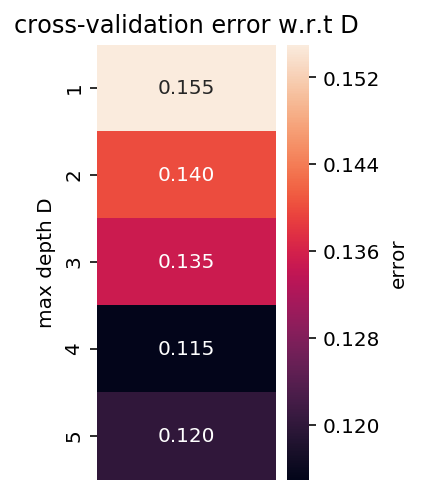

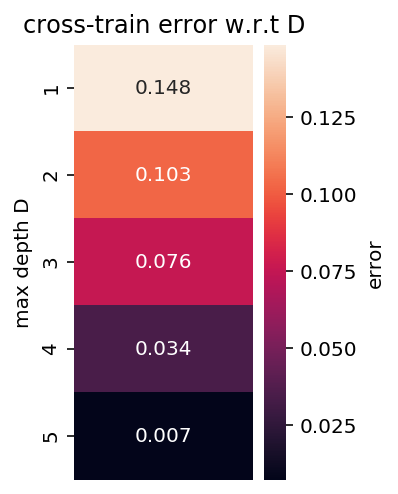

In [7]:
# Draw heatmaps for result of grid search.
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation).
# Hint: You can use .cv_results_['mean_test_score'] to obtain 
#       cross-validation accuracy (that is, average validation accuracy over 
#       different splits in the cross-validation). You need to convert it 
#       to the error.
#       Note that you need to reshape the results to shape (?, 1), which is 
#       needed by draw_heatmap().
cross_val_errors = (1 - grid_search.cv_results_['mean_test_score']).reshape(5,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

cross_train_errors = (1 - grid_search.cv_results_['mean_train_score']).reshape(5,1)
draw_heatmap(cross_train_errors, D_list, title='cross-train error w.r.t D')

In [8]:
# Show the best max depth.
# Hint: You can use the .best_params_ of the grid searcher 
#       to obtain the best parameter(s).
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth.get('max_depth')))

# Calculate the test error.
# Hint: You can use .best_estimator_.predict() to make predictions.
test_error = 1 - (grid_search.best_estimator_.predict(X_test) == Y_test).sum() / len(Y_test)
train_error = 1 - (grid_search.best_estimator_.predict(X_train) == Y_train).sum() / len(Y_train)
print(train_error)
print("Test error: {}".format(test_error))

Best max depth D: 4
0.03500000000000003
Test error: 0.1258278145695364


# EDA

In [ ]:
df.price.describe()

# What's the price distribution in our dataset?

In [ ]:
x= df.price

sns.distplot(x, bins=20, hist=True, rug=True)


In [ ]:
# sns.pairplot(df);

In [ ]:
# corr = df.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True)

# What 'drive' type cars are most expensive?

In [ ]:
sns.barplot(y=df.price, x=df.drive)
sns.set(rc={'figure.figsize':(3,0.5
                             )})

# What manufacturers are represented and how many?

In [ ]:
sns.countplot(df.manufacturer,orient="h")
sns.set(rc={'figure.figsize':(50,30)})